In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
customers = pd.read_csv('mallcustomers.csv')

In [3]:
customers.head()

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Income,200.0,60560.00,26264.721165,15000.0,41500.00,61500.0,78000.00,137000.0
SpendingScore,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


<Axes: xlabel='Gender', ylabel='Income'>

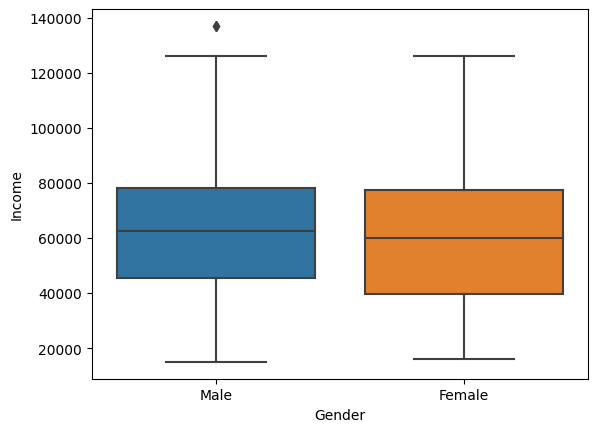

In [8]:
sns.boxplot(data=customers, x='Gender', y='Income')

<Axes: xlabel='Gender', ylabel='Age'>

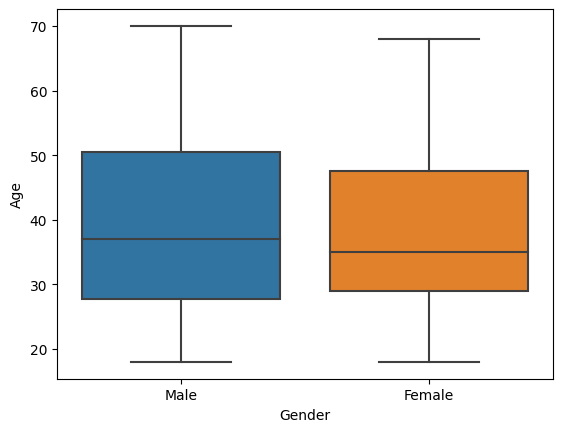

In [9]:
sns.boxplot(data=customers, x='Gender', y='Age')

<Axes: xlabel='Gender', ylabel='SpendingScore'>

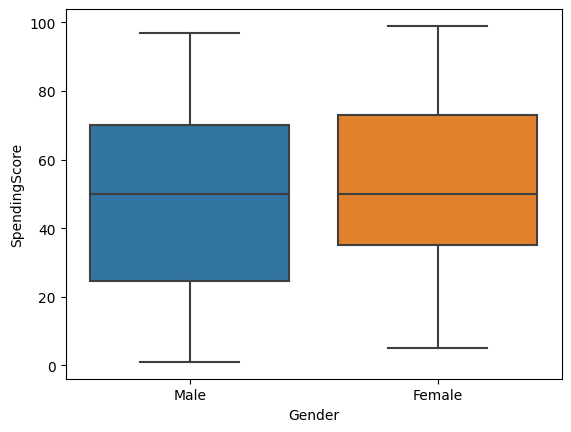

In [10]:
sns.boxplot(data=customers, x='Gender', y='SpendingScore')

<Axes: xlabel='Age', ylabel='Income'>

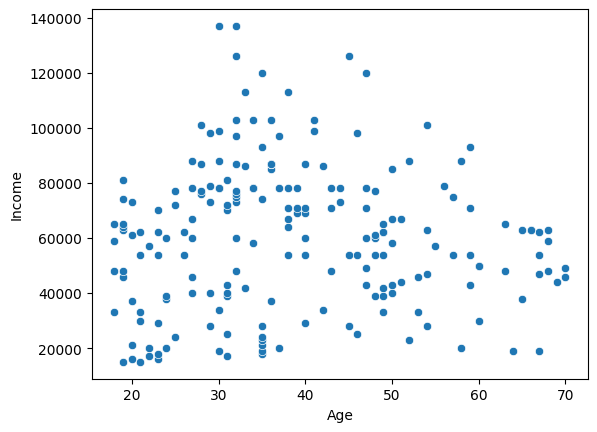

In [11]:
sns.scatterplot(data=customers, x='Age', y='Income')

<Axes: xlabel='Age', ylabel='SpendingScore'>

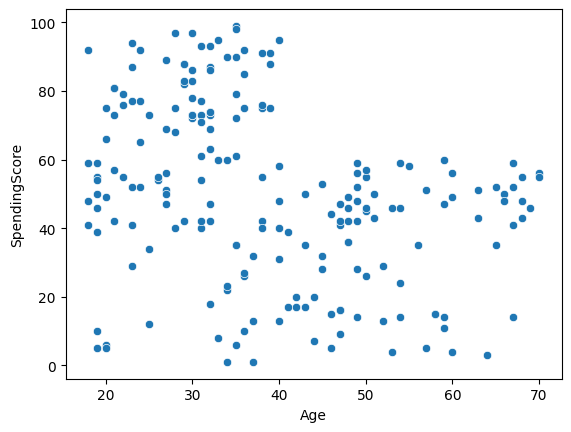

In [12]:
sns.scatterplot(data=customers, x='Age', y='SpendingScore')

<Axes: xlabel='Income', ylabel='SpendingScore'>

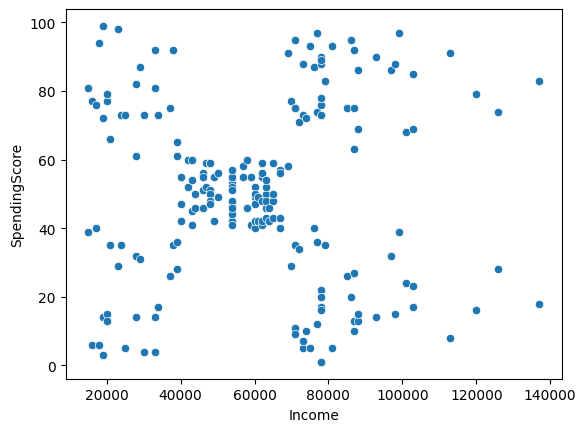

In [13]:
sns.scatterplot(data=customers, x='Income', y='SpendingScore')

<Axes: xlabel='Income', ylabel='SpendingScore'>

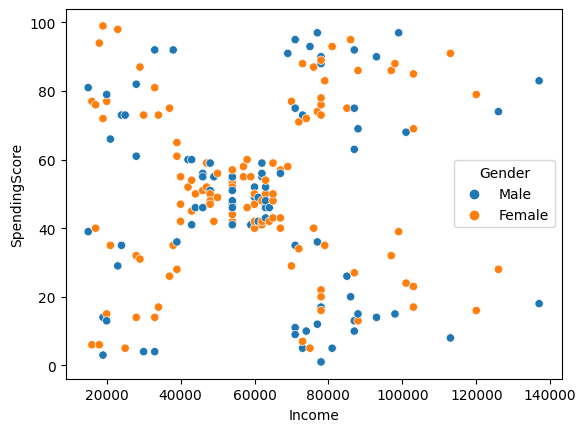

In [15]:
sns.scatterplot(data=customers, x='Income', y='SpendingScore', hue='Gender')

In [17]:
customers[['Income', 'SpendingScore']]

,Income,SpendingScore
0,15000,39
1,15000,81
2,16000,6
3,16000,77
4,17000,40
...,...,...
195,120000,79
196,126000,28
197,126000,74
198,137000,18


In [18]:
scaler = StandardScaler()
customers_scaled = scaler.fit_transform(customers[['Income', 'SpendingScore']])

In [19]:
customers_scaled = pd.DataFrame(customers_scaled, columns = ['Income', 'SpendingScore'])

In [21]:
km = KMeans(n_clusters=3, n_init=10, random_state=1234)

In [22]:
km.fit(customers_scaled)

KMeans(n_clusters=3, n_init=10, random_state=1234)

In [23]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [24]:
km.inertia_ #WCSS within cluster sum square

157.70400815035947

In [25]:
pd.Series(km.labels_).value_counts()

0    123
2     39
1     38
dtype: int64

In [26]:
km.cluster_centers_

array([[-0.62618966, -0.01439238],
       [ 1.00919971, -1.22553537],
       [ 0.99158305,  1.23950275]])

In [27]:
cluster_cent = pd.DataFrame(km.cluster_centers_, columns=['Income', 'SpendingScore'])

In [28]:
cluster_cent

,Income,SpendingScore
0,-0.626190,-0.014392
1,1.009200,-1.225535
2,0.991583,1.239503


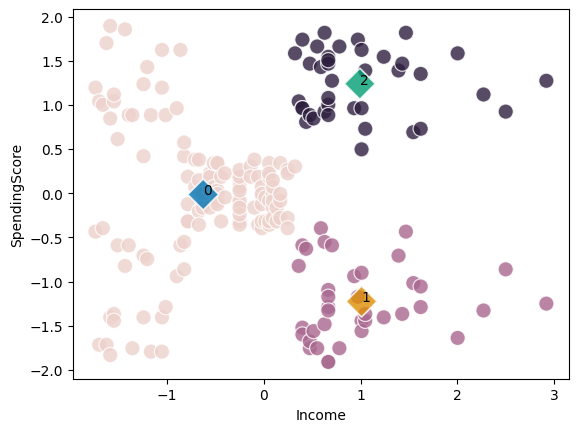

In [35]:
#plot scatter points
ax = sns.scatterplot(data=customers_scaled, x='Income', y='SpendingScore', hue=km.labels_, alpha = 0.8, s=120, legend=False)

#cenroids
ax = sns.scatterplot(data=cluster_cent, x='Income', y='SpendingScore', hue=cluster_cent.index, alpha = 0.8, s=250, legend=False, palette='colorblind', marker = 'D')

for i in range(len(cluster_cent)):
    plt.text(x=cluster_cent.Income[i], y=cluster_cent.SpendingScore[i], s=i)

In [3]:
import numpy as np
m = 2
np.zeros((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])